# Fibonacci computed with - Recursive, Iteration, and Power Methods

### I will compare their runtimes in the end.

100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 37246.32it/s]


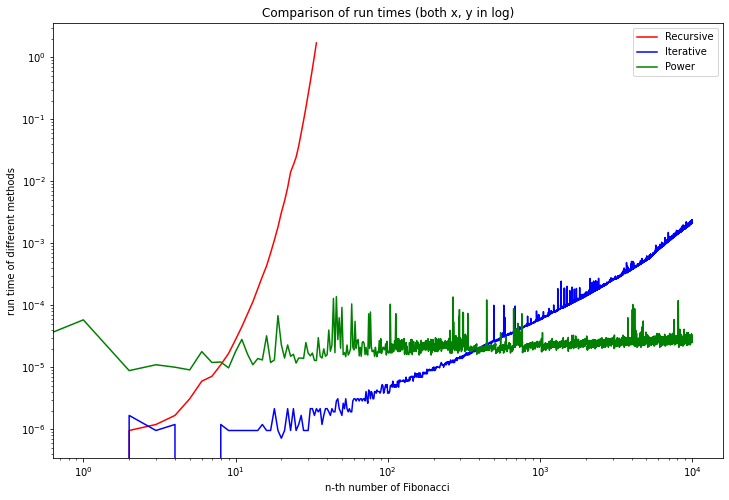

In [5]:
import time # to compute runtimes
from tqdm import tqdm # progress bar

# Rescursive method
def fibonacci_recursive(n):
    # Tackle the n = 0, 1 with an "if" statement
    if n == 0:
        return 0
    elif n == 1:
        return 1
    # Calculation start from n == 2
    else:
        return fibonacci_recursive(n-2) + fibonacci_recursive(n-1)
    pass

# Iteration method
def fibonacci_iter(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        a, b = 0, 1
        for _ in range(1, n):
            a, b = b, a+b # a and b become the former b and a+b
        return b
    pass

# Power method
import numpy as np
def EgyptianAlgo_matrix(A, n):
    I = np.array([[1,0], # initaite an numpy array
                  [0,1]])
    result = I
    
    while n > 0: # Egyptian comes in with the same structure
        if n % 2 != 0:# n is odd
            result = np.dot(result, A) # result multiplied by A
            n = n - 1  
        else: # n is even
            A = np.dot(A, A) # A multiplied by A
            n = n // 2
    
    return result

def fibonacci_power(n):
    # rule out n = 0
    if n == 0:
        return 0
    
    else:
        A = np.array([[1, 1], [1, 0]]) # initiate the base of A
        
        x_1 = np.array([1, 0]) # As defined in the question
        # call the EgyptianAlgo
        A_n_minus_1 = EgyptianAlgo_matrix(A, n-1)
        
        x_n = np.dot(A_n_minus_1, x_1) # A_n-1 multiplied by X1
    
        return x_n[0]
    pass

if __name__ == '__main__':
    """
    this section of the code only executes when
    this file is run as a script.
    """
    def get_runtimes(ns, f):
        """
        get runtimes for fibonacci(n)

        e.g.
        trecursive = get_runtimes(range(30),fibonacci_recusive)
        will get the time to compute each fibonacci number up to 29
        using fibonacci_recursive
        """         
        ts = []
        for n in tqdm(ns):
            t0 = time.time()
            fn = f(n)
            t1 = time.time()
            ts.append(t1 - t0)

        return ts


    nrecursive = range(35)
    trecursive = get_runtimes(nrecursive, fibonacci_recursive)

    niter = range(10000)
    titer = get_runtimes(niter, fibonacci_iter)

    npower = range(10000)
    tpower = get_runtimes(npower, fibonacci_power)

    import matplotlib.pyplot as plt

    # plot
    plt.figure(figsize=(12,8))
    
    # log and different color
    plt.loglog(nrecursive, trecursive, label='Recursive', color='red')
    plt.loglog(niter, titer, label='Iterative', color='blue')
    plt.loglog(npower, tpower, label='Power', color='green')
    
    # x and y axis
    plt.xlabel('n-th number of Fibonacci')
    plt.ylabel('run time of different methods')
    
    # Title
    plt.title('Comparison of run times (both x, y in log)')
    plt.legend()

    plt.show()